In [641]:
import allium
import numpy as np
import glob

import pickle 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import matplotlib as mpl
import plotly.express as px

from allium import ExperimentData


In [725]:
exp_data = 'C1_1_'
files = glob.glob('C1_1_/*.p')
files.sort()
print(files)
f = files[0]
print(f)
with open(f'{f}', 'rb') as file:
    tracks = pickle.load(file)


['C1_1_/C1_1_0_100.p', 'C1_1_/C1_1_150_250.p', 'C1_1_/C1_1_225_325.p', 'C1_1_/C1_1_75_175.p']
C1_1_/C1_1_0_100.p


In [728]:
f = files[0]
f

'C1_1_/C1_1_0_100.p'

In [729]:
data = allium.data.ExperimentData(data=tracks[0], properties=tracks[1])


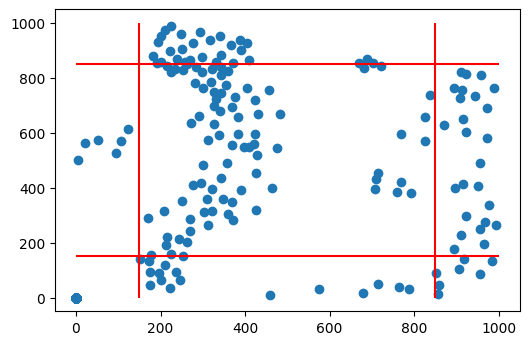

In [730]:
t = 0
plt.figure(dpi=100)
plt.scatter(data.rval[t][:,0],data.rval[t][:,1])
plt.hlines([150,850],0,1000, 'r')
plt.vlines([150,850],0,1000, 'r')
# plt.hlines(100,0,1000, 'r')

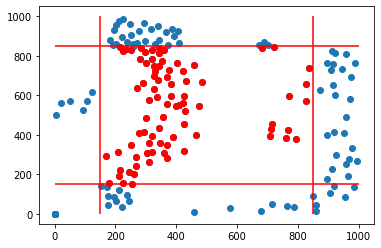

In [731]:
ind = list(set(((150<data.rval[t][:,1]) & (data.rval[t][:,1] <850))*range(len(data.rval[t])))
           .intersection(((150<data.rval[t][:,0]) & (data.rval[t][:,0] <850))*range(len(data.rval[t]))))

plt.scatter(data.rval[t][:,0],data.rval[t][:,1])
# plt.scatter(data.rval[t][:,0][(150<data.rval[t][:,0]) & (data.rval[t][:,0] <850)],
#             data.rval[t][:,1][(150<data.rval[t][:,0]) & (data.rval[t][:,0] <850)], c='g')
# plt.scatter(data.rval[t][:,0][(150<data.rval[t][:,1]) & (data.rval[t][:,1] <850)],
#             data.rval[t][:,1][(150<data.rval[t][:,1]) & (data.rval[t][:,1] <850)], c='orange')
plt.hlines([150,850],0,1000, 'r')
plt.vlines([150,850],0,1000, 'r')

plt.scatter(data.rval[t][:,0][ind][1:],
            data.rval[t][:,1][ind][1:], c='red')


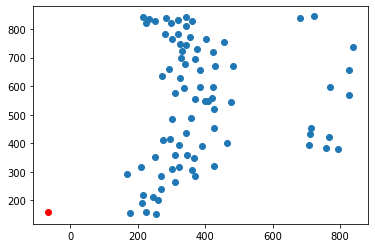

In [732]:
n = 60
plt.scatter(data.rval[t][:,0][ind][1:],
            data.rval[t][:,1][ind][1:])

plt.scatter(x[n],
            y[n], c='r')


In [733]:
def ApplyPeriodic2d(L,dr,):
    dr[0]-=L[0]*np.round(dr[0]/L[0])
    dr[1]-=L[1]*np.round(dr[1]/L[1])
    return dr


In [734]:
def calc_dist(p1,p2):
    dr = np.sqrt((ApplyPeriodic2d(L,p1-p2)**2).sum(axis=0))
    return dr

In [735]:
def find_near(particle,lower,upper):
    dr = np.sqrt((ApplyPeriodic2d(L,xy - particle)**2).sum(axis=1))
    return (lower < dr) & (dr < upper)

In [736]:
#have to renormalise due to taking section
x = data.rval[t][:,0][ind][1:] - 150
y = data.rval[t][:,1][ind][1:] - 150
xy =  data.rval[t][ind][1:] - 150

In [737]:
L = [700,700]
dr = xy - xy[n]
dr[:,0]-=L[0]*np.round(dr[:,0]/L[0])
dr[:,1]-=L[1]*np.round(dr[:,1]/L[1])

dr = np.abs((ApplyPeriodic2d(L,xy - xy[n])).sum(axis=1))
# dr

In [738]:
# particle = 50

# find_near(particle,10,50)

In [739]:
resolution = 15

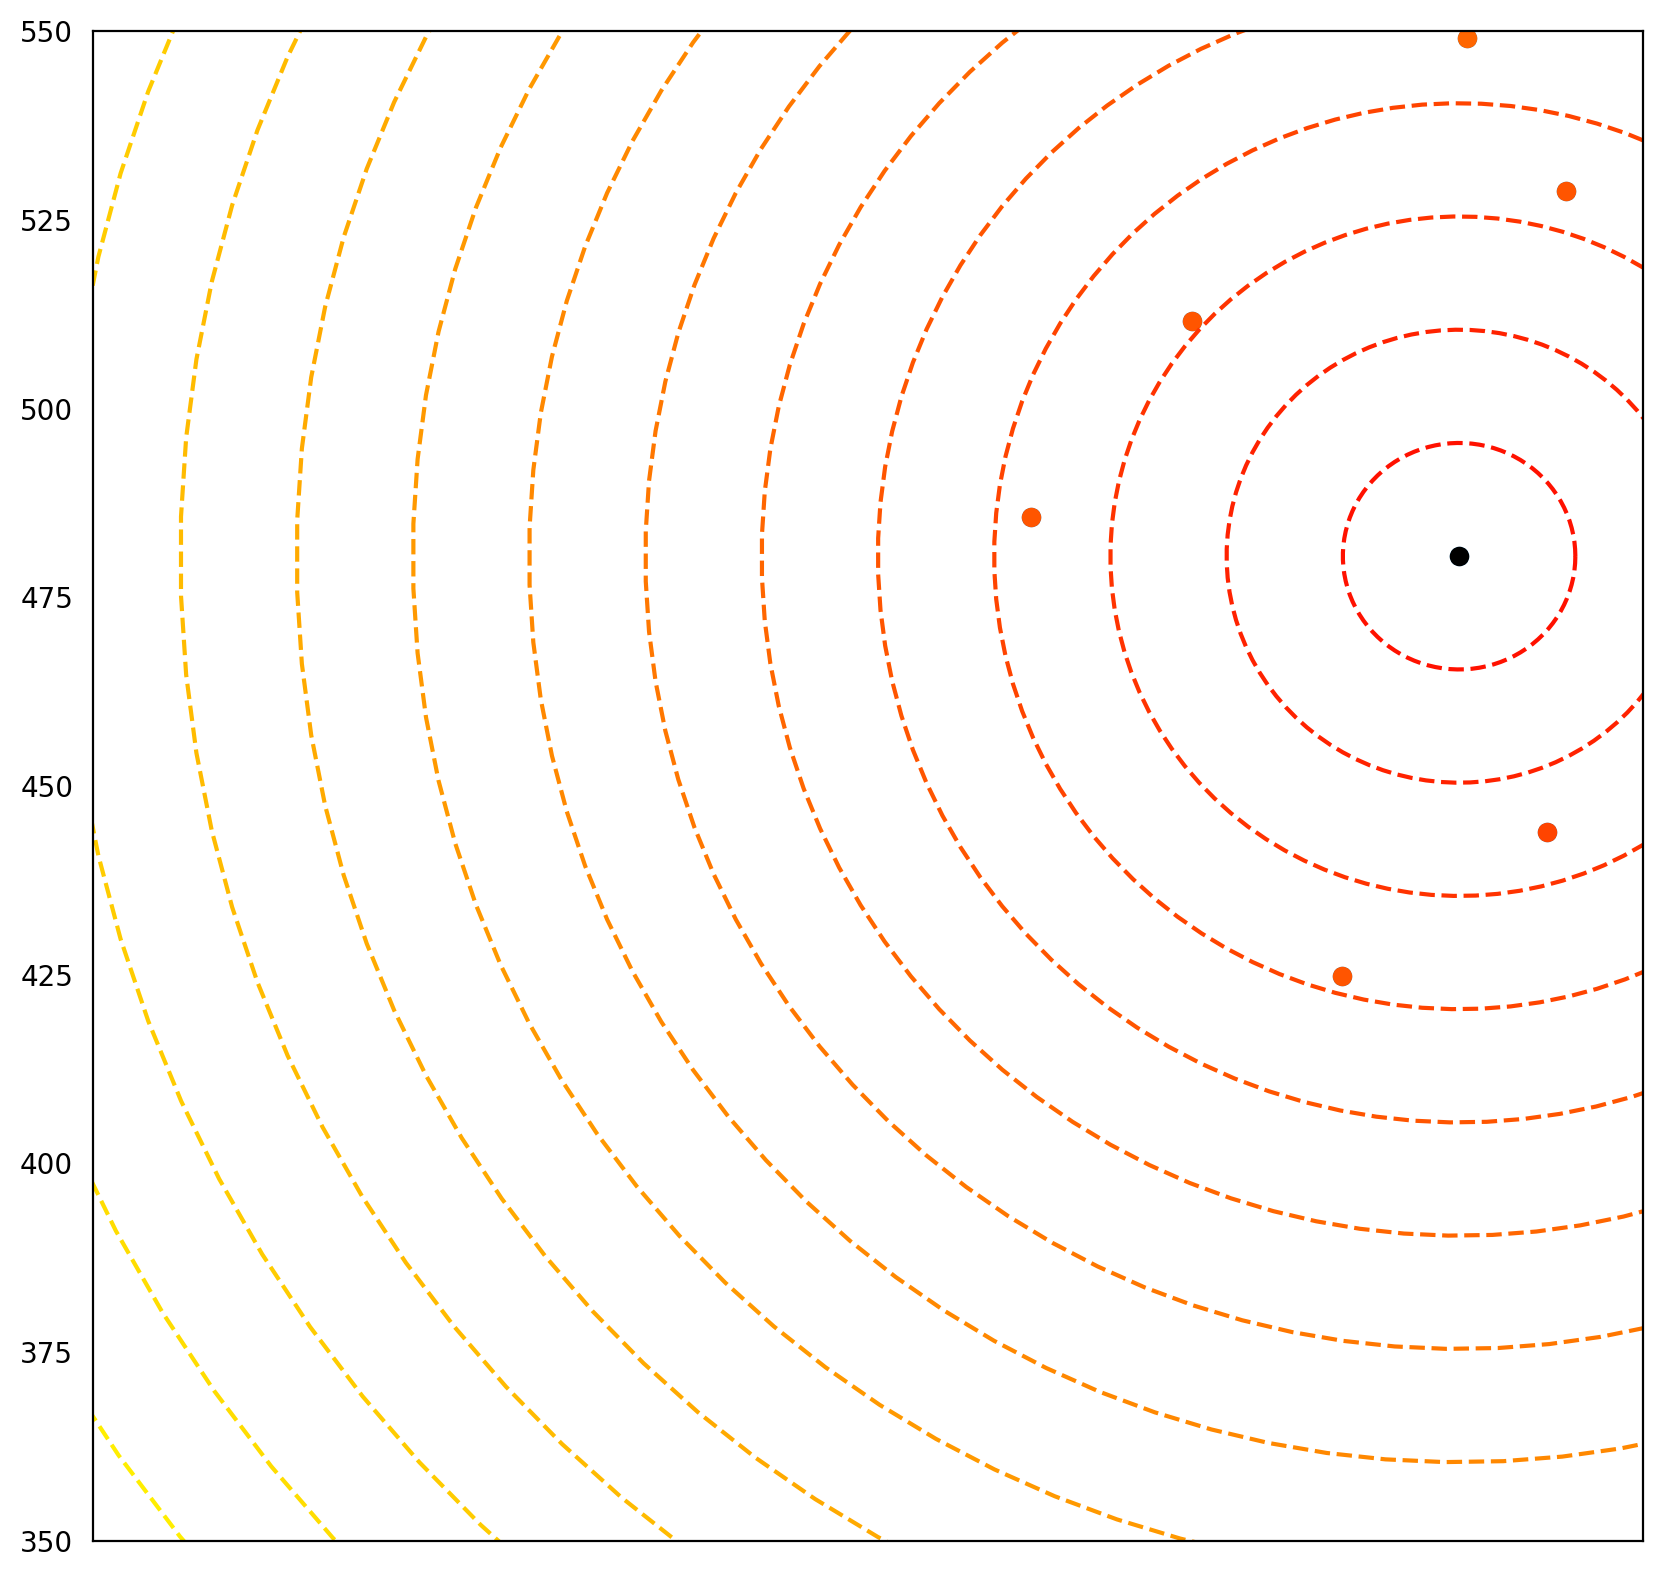

In [741]:
fig=plt.figure(figsize = (10,10), dpi=200)
n = 40
plt.scatter(x,y)

# plt.scatter(x[near],
#             y[near], c='k')

plt.scatter(x[n],
            y[n], c='k')

cmap = mpl.cm.autumn
theta = np.linspace(0, 2*np.pi, 100)
for i in range(15):
    near =  find_near(xy[n],r-resolution, r)
    r = i*resolution
    x1 = r*np.cos(theta) + x[n]
    x2 = r*np.sin(theta) + y[n]
    plt.plot(x1, x2, '--',color=cmap(i / float(15)))

    plt.scatter(x[near],
                y[near],color=cmap(i / float(15)))
plt.xlim([0,200])
plt.ylim([350,550])

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False) # labels along the bottom edge are off

In [742]:
max_distance = L[0]/4
resolution = 2
Nrings = int(max_distance/resolution)

bins = np.zeros(Nrings)
area = np.zeros(Nrings)

for j in range(Nrings):
    r1 = j * resolution
    area[j] = 2*np.pi*r1*resolution

for p in xy:
    for i,b in enumerate(bins):
        r = i*resolution
        near =  find_near(p,r-resolution, r)

        bins[i] += near.sum()

In [743]:
rdist = np.linspace(0,max_distance,Nrings)

<ipython-input-744-7485241cab2d>:1: RuntimeWarning:

invalid value encountered in true_divide



(0.0, 175.0)

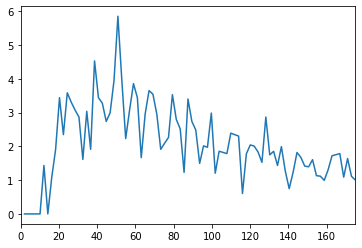

In [744]:
plt.plot(rdist, (bins/area)/(bins/area)[-1])
plt.xlim([0,max_distance])

# Plotting over time (every 10 frames)

t = 1

<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



<ipython-input-745-d1cf1c40bb72>:33: RuntimeWarning:

invalid value encountered in true_divide



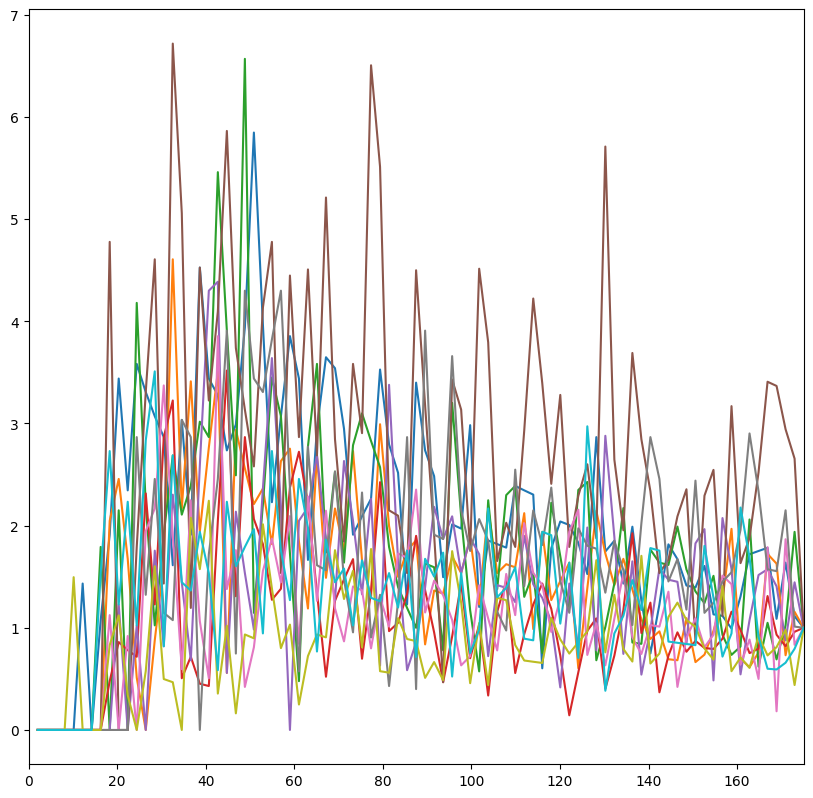

In [745]:
plot = False

max_distance = L[0]/4
resolution = 2
Nrings = int(max_distance/resolution)

area = np.zeros(Nrings)
for j in range(Nrings):
    r1 = j * resolution
    area[j] = 2*np.pi*r1*resolution

tbins = np.zeros(Nrings)

fig=plt.figure(figsize = (10,10), dpi=100)
for t in range(data.Nsnap):
    bins = np.zeros(Nrings)

    print(f't = {t}', end='\r')
    #have to renormalise due to taking section
    x = data.rval[t][:,0][ind][1:] - 150
    y = data.rval[t][:,1][ind][1:] - 150
    xy =  data.rval[t][ind][1:] - 150

    for p in xy:
        for i,b in enumerate(bins):
            r = i*resolution
            near =  find_near(p,r-resolution, r)

            bins[i] += near.sum()
            tbins[i] += near.sum()

    if not t % 10:
        plt.plot(rdist, (bins/area)/(bins/area)[-1])
        plt.xlim([0,max_distance])


<ipython-input-746-3138635b4a01>:3: RuntimeWarning:

invalid value encountered in true_divide



Text(0, 0.5, 'g(r)')

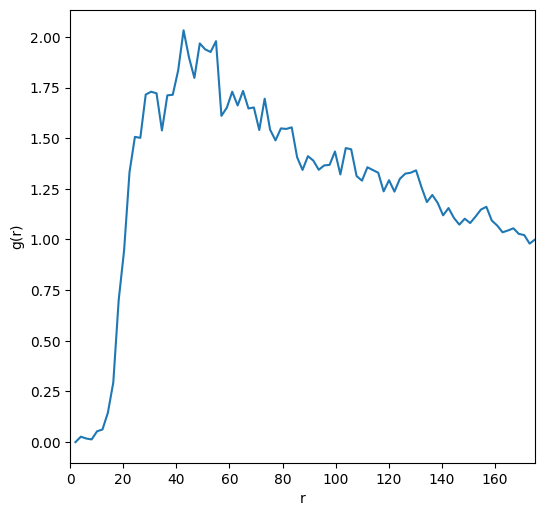

In [746]:
fig=plt.figure(figsize = (6,6), dpi=100)

plt.plot(rdist, (tbins/data.Nsnap/area)/(tbins/data.Nsnap/area)[-1])
plt.xlim([0,max_distance])
plt.xlabel('r')
plt.ylabel('g(r)')

In [748]:

gr = (tbins/data.Nsnap/area)[1:]
rdist[np.where(gr == max(gr))][0]

#'C1_1_/C1_1_225_325.p' =  22.38372093023256
#'C1_1_/C1_1_0_100.p' =  40.69767441860465
f

<ipython-input-748-b0448347f100>:1: RuntimeWarning:

invalid value encountered in true_divide



'C1_1_/C1_1_0_100.p'

In [ ]:
exp_data = 'C1_1_'
files = glob.glob('C1_1_/*.p')
files.sort()
print(files)
f = files[1]
print(f)
with open(f'{f}', 'rb') as file:
    tracks = pickle.load(file)


In [779]:
f

'C1_1_/C1_1_225_325.p'

In [760]:
section = [150,150]
Lx = 1000
Ly = 1000

In [763]:
L = [l - 2*s for (l,s) in zip([Lx,Ly], section)]
L

[700, 700]

In [ ]:
section = [150,150]
Lx = 1000
Ly = 1000

L = [l - 2*s for (l,s) in zip([Lx,Ly], section)]

plot = False
fig=plt.figure(figsize = (6,6), dpi=100)

for f in files:
    print(f)
    max_distance = L[0]/4
    resolution = 2
    Nrings = int(max_distance/resolution)

    tbins = np.zeros(Nrings)
    with open(f'{f}', 'rb') as file:
        tracks = pickle.load(file)
    data = allium.data.ExperimentData(data=tracks[0], properties=tracks[1])
    # loop through the frames and calculate g(r) 
    for t in range(data.Nsnap):
        # only consider a subsection of the data
        ind = list(set(((150<data.rval[t][:,1]) & (data.rval[t][:,1] <850))*range(len(data.rval[t])))
                   .intersection(((150<data.rval[t][:,0]) & (data.rval[t][:,0] <850))*range(len(data.rval[t]))))

        bins = np.zeros(Nrings)

        print(f't = {t}', end='\r')
        #have to renormalise due to taking section
        x = data.rval[t][:,0][ind][1:] - 150
        y = data.rval[t][:,1][ind][1:] - 150
        xy =  data.rval[t][ind][1:] - [150,150]

        for p in xy:
            for i,b in enumerate(bins):
                r = i*resolution
                near =  find_near(p,r-resolution, r)

                bins[i] += near.sum()
                tbins[i] += near.sum()

        if plot:
            plt.plot(rdist, (bins/area)/(bins/area)[-1])
            plt.xlim([0,max_distance])
    # plot the averaged g(r)
    plt.plot(rdist, tbins/data.Nsnap/area/(tbins/data.Nsnap/area)[-1])
    plt.xlim([0,max_distance])
    plt.xlabel('r')
    plt.ylabel('g(r)')

C1_1_/C1_1_0_100.p


<ipython-input-790-7e04b6dca7cd>:46: RuntimeWarning:

invalid value encountered in true_divide



C1_1_/C1_1_150_250.p


<ipython-input-790-7e04b6dca7cd>:46: RuntimeWarning:

invalid value encountered in true_divide



C1_1_/C1_1_225_325.p


<ipython-input-790-7e04b6dca7cd>:46: RuntimeWarning:

invalid value encountered in true_divide



C1_1_/C1_1_75_175.p


<ipython-input-778-cad3e690d48f>:1: RuntimeWarning:

invalid value encountered in true_divide



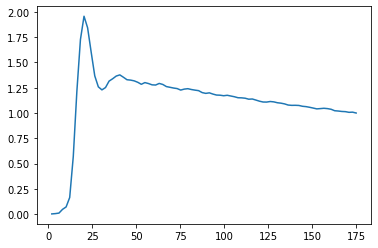

In [778]:
plt.plot(rdist, tbins/data.Nsnap/area/(tbins/data.Nsnap/area)[-1])

In [788]:
gr = tbins/data.Nsnap/area/(tbins/data.Nsnap/area)[-1]
gr = gr[1:]
rdist[np.where(gr == max(gr))]


<ipython-input-788-6101bdde0b37>:1: RuntimeWarning:

invalid value encountered in true_divide



array([18.31395349])